## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.321944  0.939825  1.111832  0.325502  0.550654  0.946224
1  1.479082 -0.175899  1.145050  0.996331  1.204264  1.855393
2  0.127062 -1.300051  1.007810 -0.246061  0.961356 -0.553508
3 -0.930527  0.599877 -1.137015  1.528395  0.309256  0.871160
4  0.470001 -0.615640  0.752205 -0.405826 -0.520210 -0.453845


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9928871	total: 69.4ms	remaining: 1m 9s
1:	learn: 0.9832610	total: 70.1ms	remaining: 35s
2:	learn: 0.9713158	total: 71ms	remaining: 23.6s
3:	learn: 0.9595450	total: 71.6ms	remaining: 17.8s
4:	learn: 0.9507090	total: 72.2ms	remaining: 14.4s
5:	learn: 0.9411596	total: 72.7ms	remaining: 12s
6:	learn: 0.9287747	total: 73.2ms	remaining: 10.4s
7:	learn: 0.9192647	total: 73.8ms	remaining: 9.15s
8:	learn: 0.9101458	total: 74.3ms	remaining: 8.18s
9:	learn: 0.9019372	total: 74.8ms	remaining: 7.41s
10:	learn: 0.8915568	total: 75.3ms	remaining: 6.77s
11:	learn: 0.8811325	total: 76ms	remaining: 6.25s
12:	learn: 0.8717647	total: 76.5ms	remaining: 5.81s
13:	learn: 0.8639380	total: 77.1ms	remaining: 5.43s
14:	learn: 0.8560767	total: 77.6ms	remaining: 5.09s
15:	learn: 0.8474712	total: 78ms	remaining: 4.8s
16:	learn: 0.8399735	total: 78.5ms	remaining: 4.54s
17:	learn: 0.8308706	total: 79.1ms	remaining: 4.32s
18:	learn: 0.8226397	total: 79.6ms	remaining: 4.11s
19:

82:	learn: 0.4604199	total: 108ms	remaining: 1.19s
83:	learn: 0.4566395	total: 108ms	remaining: 1.18s
84:	learn: 0.4526063	total: 109ms	remaining: 1.17s
85:	learn: 0.4490528	total: 109ms	remaining: 1.16s
86:	learn: 0.4454379	total: 110ms	remaining: 1.15s
87:	learn: 0.4422376	total: 110ms	remaining: 1.14s
88:	learn: 0.4388342	total: 110ms	remaining: 1.13s
89:	learn: 0.4354107	total: 111ms	remaining: 1.12s
90:	learn: 0.4319605	total: 111ms	remaining: 1.11s
91:	learn: 0.4284698	total: 112ms	remaining: 1.1s
92:	learn: 0.4245838	total: 112ms	remaining: 1.09s
93:	learn: 0.4209557	total: 112ms	remaining: 1.08s
94:	learn: 0.4174155	total: 113ms	remaining: 1.07s
95:	learn: 0.4140818	total: 113ms	remaining: 1.06s
96:	learn: 0.4107629	total: 113ms	remaining: 1.06s
97:	learn: 0.4082788	total: 114ms	remaining: 1.05s
98:	learn: 0.4045992	total: 114ms	remaining: 1.04s
99:	learn: 0.4015011	total: 115ms	remaining: 1.03s
100:	learn: 0.3987189	total: 115ms	remaining: 1.02s
101:	learn: 0.3953861	total: 11

256:	learn: 0.1305237	total: 188ms	remaining: 543ms
257:	learn: 0.1297552	total: 188ms	remaining: 542ms
258:	learn: 0.1289513	total: 189ms	remaining: 540ms
259:	learn: 0.1281461	total: 189ms	remaining: 538ms
260:	learn: 0.1274138	total: 189ms	remaining: 536ms
261:	learn: 0.1263021	total: 190ms	remaining: 535ms
262:	learn: 0.1253575	total: 190ms	remaining: 533ms
263:	learn: 0.1245274	total: 191ms	remaining: 531ms
264:	learn: 0.1234407	total: 191ms	remaining: 530ms
265:	learn: 0.1227841	total: 191ms	remaining: 528ms
266:	learn: 0.1216454	total: 192ms	remaining: 527ms
267:	learn: 0.1208739	total: 192ms	remaining: 525ms
268:	learn: 0.1200245	total: 193ms	remaining: 524ms
269:	learn: 0.1192276	total: 193ms	remaining: 523ms
270:	learn: 0.1184744	total: 194ms	remaining: 521ms
271:	learn: 0.1174248	total: 194ms	remaining: 520ms
272:	learn: 0.1166134	total: 195ms	remaining: 519ms
273:	learn: 0.1158118	total: 196ms	remaining: 518ms
274:	learn: 0.1148318	total: 196ms	remaining: 517ms
275:	learn: 

475:	learn: 0.0348347	total: 291ms	remaining: 321ms
476:	learn: 0.0347609	total: 292ms	remaining: 320ms
477:	learn: 0.0345422	total: 292ms	remaining: 319ms
478:	learn: 0.0343726	total: 293ms	remaining: 318ms
479:	learn: 0.0342000	total: 293ms	remaining: 318ms
480:	learn: 0.0339876	total: 294ms	remaining: 317ms
481:	learn: 0.0338194	total: 294ms	remaining: 316ms
482:	learn: 0.0336121	total: 294ms	remaining: 315ms
483:	learn: 0.0334068	total: 295ms	remaining: 314ms
484:	learn: 0.0332424	total: 295ms	remaining: 314ms
485:	learn: 0.0330419	total: 296ms	remaining: 313ms
486:	learn: 0.0328827	total: 296ms	remaining: 312ms
487:	learn: 0.0327312	total: 297ms	remaining: 311ms
488:	learn: 0.0325822	total: 297ms	remaining: 310ms
489:	learn: 0.0324277	total: 297ms	remaining: 310ms
490:	learn: 0.0322831	total: 298ms	remaining: 309ms
491:	learn: 0.0320881	total: 298ms	remaining: 308ms
492:	learn: 0.0320241	total: 299ms	remaining: 307ms
493:	learn: 0.0318222	total: 299ms	remaining: 306ms
494:	learn: 

642:	learn: 0.0184917	total: 371ms	remaining: 206ms
643:	learn: 0.0183993	total: 371ms	remaining: 205ms
644:	learn: 0.0183386	total: 372ms	remaining: 205ms
645:	learn: 0.0182535	total: 372ms	remaining: 204ms
646:	learn: 0.0181943	total: 373ms	remaining: 203ms
647:	learn: 0.0181193	total: 373ms	remaining: 203ms
648:	learn: 0.0180419	total: 374ms	remaining: 202ms
649:	learn: 0.0179533	total: 374ms	remaining: 201ms
650:	learn: 0.0178961	total: 374ms	remaining: 201ms
651:	learn: 0.0178407	total: 375ms	remaining: 200ms
652:	learn: 0.0177543	total: 375ms	remaining: 200ms
653:	learn: 0.0177001	total: 376ms	remaining: 199ms
654:	learn: 0.0175908	total: 376ms	remaining: 198ms
655:	learn: 0.0174837	total: 377ms	remaining: 198ms
656:	learn: 0.0173988	total: 377ms	remaining: 197ms
657:	learn: 0.0173154	total: 378ms	remaining: 196ms
658:	learn: 0.0172706	total: 378ms	remaining: 196ms
659:	learn: 0.0172267	total: 379ms	remaining: 195ms
660:	learn: 0.0171521	total: 379ms	remaining: 194ms
661:	learn: 

859:	learn: 0.0088708	total: 474ms	remaining: 77.1ms
860:	learn: 0.0088209	total: 474ms	remaining: 76.6ms
861:	learn: 0.0087825	total: 475ms	remaining: 76ms
862:	learn: 0.0087494	total: 476ms	remaining: 75.5ms
863:	learn: 0.0087325	total: 476ms	remaining: 74.9ms
864:	learn: 0.0086860	total: 476ms	remaining: 74.4ms
865:	learn: 0.0086386	total: 477ms	remaining: 73.8ms
866:	learn: 0.0086067	total: 477ms	remaining: 73.2ms
867:	learn: 0.0085885	total: 478ms	remaining: 72.7ms
868:	learn: 0.0085706	total: 478ms	remaining: 72.1ms
869:	learn: 0.0085531	total: 479ms	remaining: 71.5ms
870:	learn: 0.0085359	total: 479ms	remaining: 71ms
871:	learn: 0.0085113	total: 480ms	remaining: 70.4ms
872:	learn: 0.0084944	total: 480ms	remaining: 69.9ms
873:	learn: 0.0084778	total: 481ms	remaining: 69.3ms
874:	learn: 0.0084538	total: 481ms	remaining: 68.8ms
875:	learn: 0.0084382	total: 482ms	remaining: 68.2ms
876:	learn: 0.0084221	total: 482ms	remaining: 67.6ms
877:	learn: 0.0084067	total: 483ms	remaining: 67.1

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

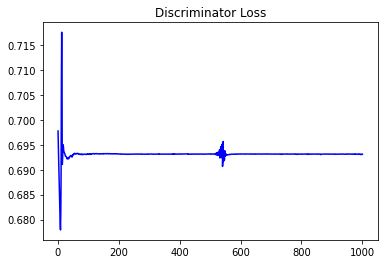

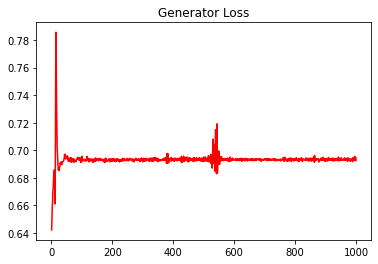

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.13311669094938564


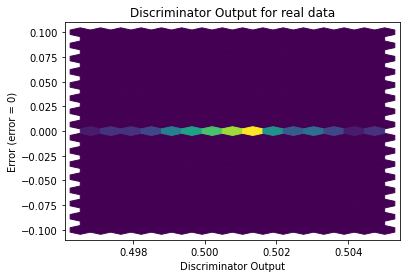

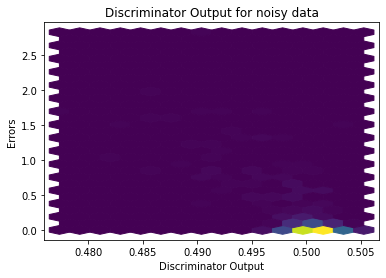

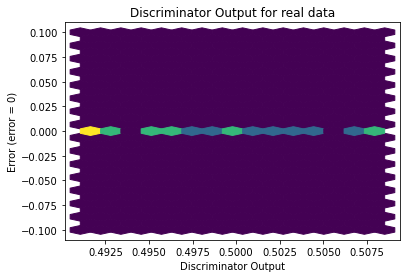

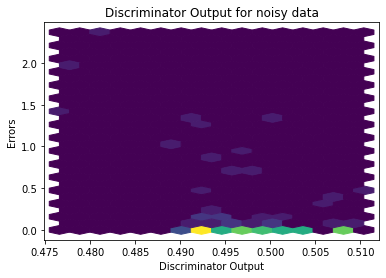

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


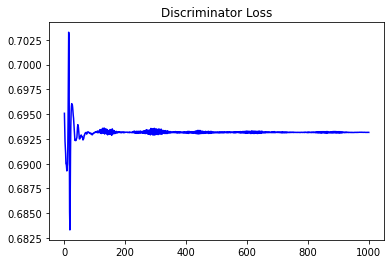

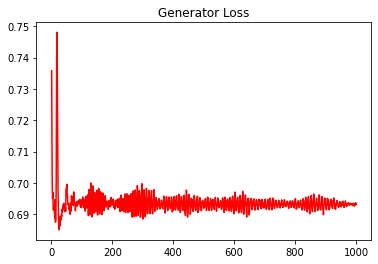

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.17050473628934418


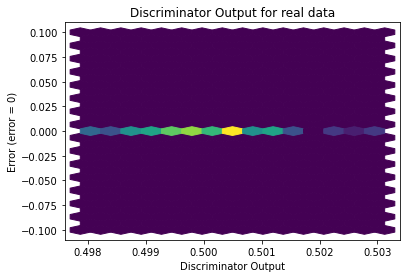

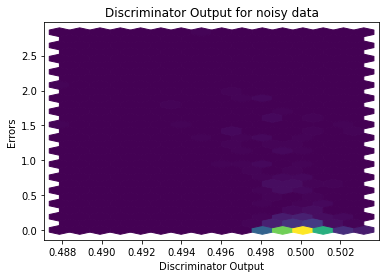

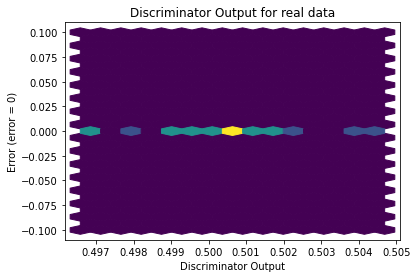

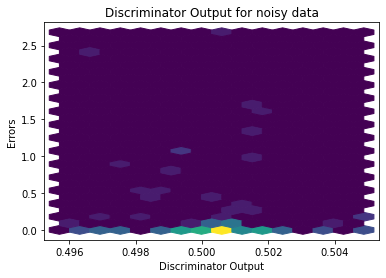

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1798]], requires_grad=True)
